# Statistical and numerical methods in cosmology
# HW #5
### *Hernán E. Noriega B.*
### Instituto de Física, Universidad Nacional Autónoma de México

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
from matplotlib import pyplot as plt
import numpy as np
import math
import getopt 
import scipy as sp 
from scipy import special
print('Using CAMB')
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower

Using CAMB


## 1 Generate a Gaussian Random Field in 2D

The max frequency (Nyquist) $k_{x_{max}}$ and the $k_{x_{min}}$ are given by,  
 
 $$k_{x_{max}}={\pi n}/{x_{max}} \quad \& \quad  k_{x_{min}} = 2\pi/x_{x_{max}}$$
 
 where: $n = 100$ are the total points and $x_{max} = 10$ is the max distance in real space ($x$ axis), the same apply for $y$ axis

In [2]:
#-Create a 2D real space array between 0 and 10 with 100 per 100 values (100 × 100)

x_max = y_max = 10 #max value (in each axis)
n = 100 #values (in each axis)
x_arr = y_arr =  np.linspace(0,x_max,n) #x_arr: 1D array  (the same for y_arr)
r_arr, r_2arr = np.meshgrid(x_arr,y_arr) #r_arr: 2D array, 100x100 matrix

#- Get the corresponding frequencies with the corresponding binning information

m = int(n/2) 
step = x_max/n #step in each axis of real space
k_x = k_y = np.fft.fftshift(np.fft.fftfreq(n, d = step)*2*np.pi) #organized freqs
kmax = np.amax(np.abs(k_x)) #max freq

#-Generate the corresponding 2D array of values k = sqrt(kx²+ky²)

k_mod = np.zeros((len(k_x), (len(k_y))))
for ii in range(len(k_x)):
    for jj in range(len(k_y)):
        k_mod[ii][jj] = np.sqrt(k_x[ii]**2 + k_y[jj]**2)
        
#-Create a Power spectrum in 2D space

eps = 0.1 #eps: epsilon (given at HW5)

def P(k):
    return (k + eps)**(-2)

P_k = P(k_mod) #power spectrum for k_mod

Remember, 

$${ \delta  }_{ \vec{k} }=\left| { \delta  }_{\vec{k}} \right| { e }^{ i{ \phi  }_{\vec{k} } },\quad { \delta  }_{ \vec{k}}^{ * }=\left| { \delta  }_{ \vec{k} } \right| { e }^{ -i{ \phi  }_{ \vec{k} } }$$

where,

$$\left| { \delta  }_{ \vec{k} } \right| \sim  \mathcal{N}(0,\sigma^{2}=P(k)), \quad  { \phi  }_{ \vec{k}}\sim \mathcal{U}([0,2\pi])$$

Reality cond. $$\delta_{-\vec{k}}={ \delta  }_{\vec{k}}^{ * }$$

In [3]:
#-Generate five random realizations of the Fourier coefficients (the field is real)

#np.random.randn: standard normal distribution -->> mod_delta_k (modulus)
#np.random.rand: uniform distribution -->> phi_k (phase)

rl = 10 #rl: realizations 

std = np.sqrt(P_k) #std: standard deviation
mod_delta_k = std * np.random.randn(rl, n, n) #modulus 
phi_k = 2 * np.pi * np.random.rand(rl, n, n) #phase 
deltak = mod_delta_k * np.exp(1j * phi_k) #deltak 

#we re-organize deltak -> delta_k
delta_k = np.zeros((rl, n, n), dtype = 'complex') 
for kk in range(rl):
    for ii in range(1, m+1):
         for jj in range(1, n):               
            delta_k[kk][ii][jj] = deltak[kk][ii][jj] 
            delta_k[kk][n-ii][n-jj] = np.conj(delta_k[kk][ii][jj]) #reality condition
    delta_k[kk][m][m] =  mod_delta_k[kk][m][m] #at m=n/2 (k=0)-> (real)
    for i in range(n):
        delta_k[kk][i][0] = deltak[kk][i][0] 
        delta_k[kk][0][i] = deltak[kk][0][i]

#-Do the inverse Fourier transform of the 5 realizations    

delta_r = np.fft.ifftn(np.fft.ifftshift(delta_k)).real #np.fft.ifftshift to re-order

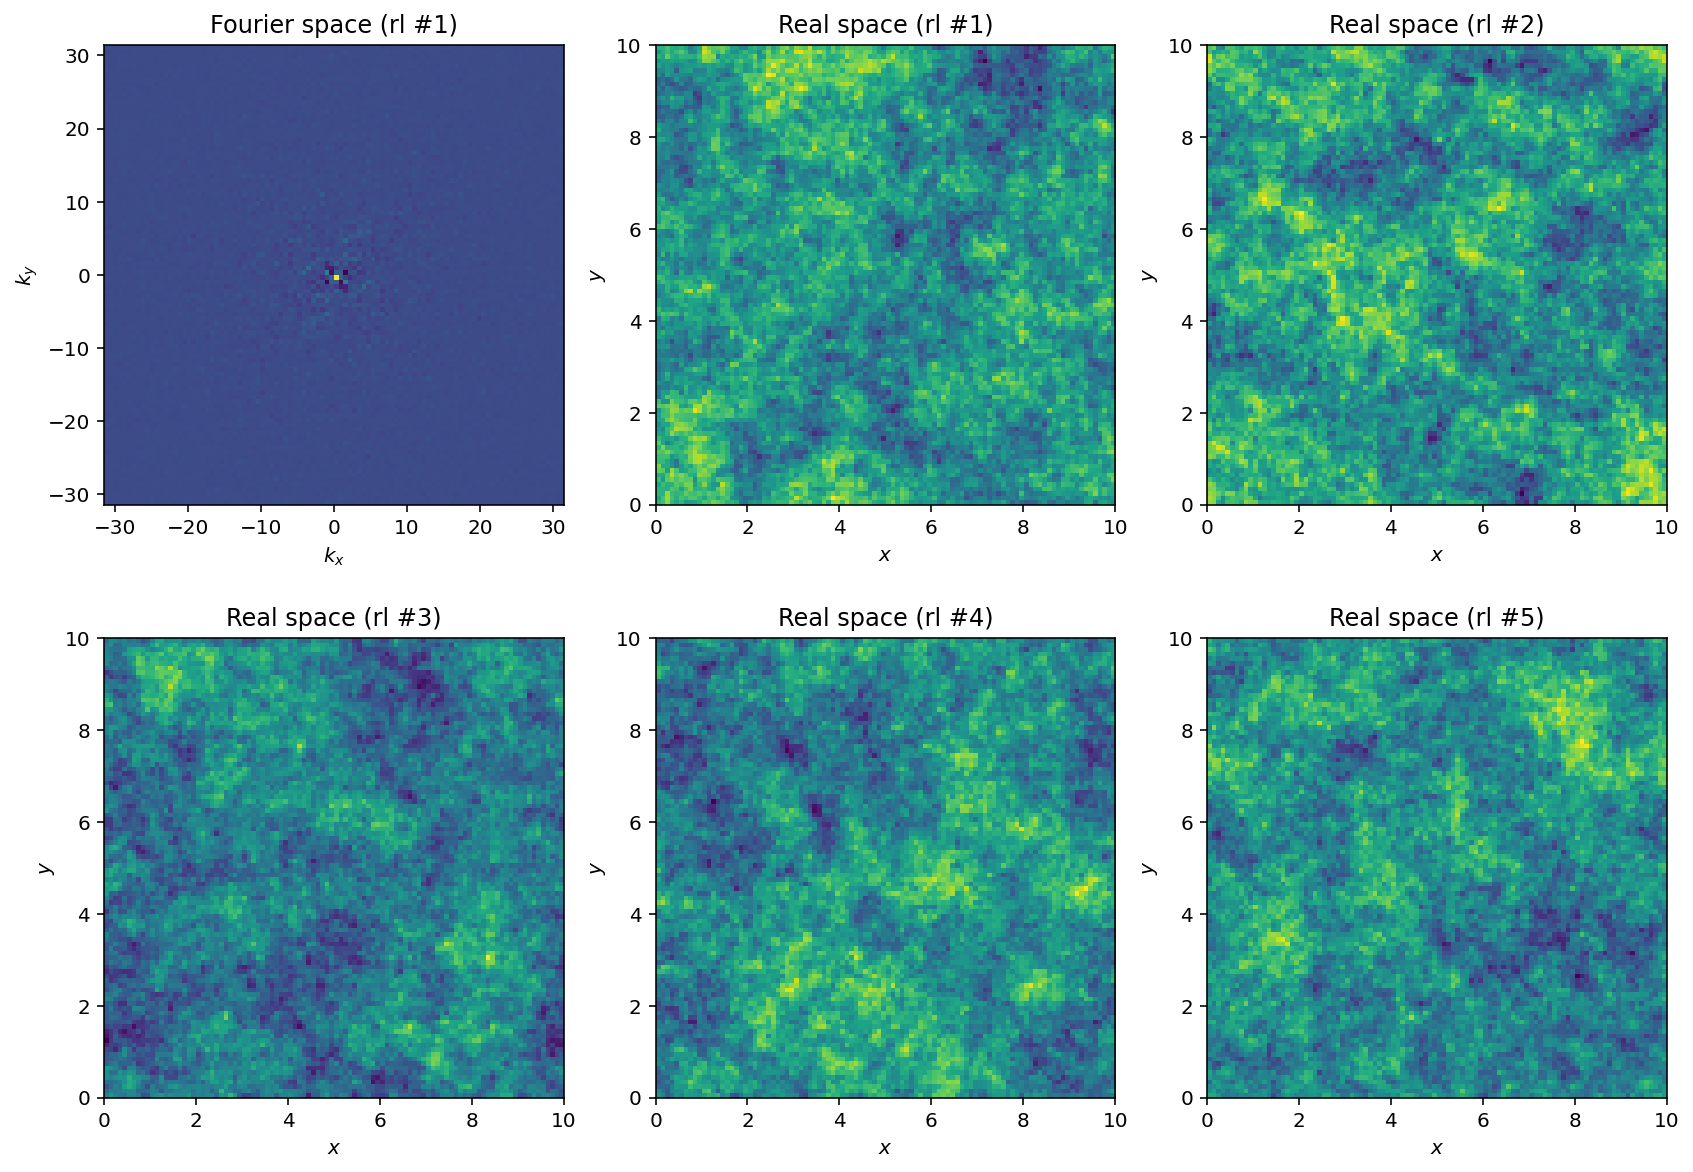

In [4]:
#-Plot the 5 realizations
#Rl: realization

fig, axs = plt.subplots(2,3,figsize=(14,10))

axs[0, 0].imshow((delta_k[0]).real, extent = [-kmax , kmax, -kmax, kmax])
axs[0, 0].set_xlabel(r'$k_x$')
axs[0, 0].set_ylabel(r'$k_y$')
axs[0, 0].set_title(r'Fourier space (rl #1)')
    
axs[0, 1].imshow((delta_r[0]), extent = [0 , x_max, 0, y_max])
axs[0, 1].set_title(r'Real space (rl #1)')
axs[0, 1].set_xlabel(r'$x$')
axs[0, 1].set_ylabel(r'$y$')

axs[0, 2].imshow((delta_r[1]), extent = [0 , x_max, 0, y_max])
axs[0, 2].set_title(r'Real space (rl #2)')
axs[0, 2].set_xlabel(r'$x$')
axs[0, 2].set_ylabel(r'$y$')

axs[1, 0].imshow((delta_r[2]), extent = [0 , x_max, 0, y_max])
axs[1, 0].set_title(r'Real space (rl #3)')
axs[1, 0].set_xlabel(r'$x$')
axs[1, 0].set_ylabel(r'$y$')

axs[1, 1].imshow((delta_r[3]), extent = [0 , x_max, 0, y_max])
axs[1, 1].set_title(r'Real space (rl #4)')
axs[1, 1].set_xlabel(r'$x$')
axs[1, 1].set_ylabel(r'$y$')

axs[1, 2].imshow((delta_r[4]), extent = [0 , x_max, 0, y_max])
axs[1, 2].set_title(r'Real space (rl #5)')
axs[1, 2].set_xlabel(r'$x$')
axs[1, 2].set_ylabel(r'$y$')

plt.show()

## 2 Use spherical Harmonics to generate a realistic CMB realisation

In [5]:
#CAMB Parameters as "pars"
pars = camb.CAMBparams() 

#cosmology
omegab = 0.05 #barions
omegac = 0.25 #cdm
omegal= 1-omegab-omegac #lambda
h = 0.7 

print('Cosmology,')
print('Om_b=', omegab,',Om_c=', omegac,',Omega_l=',omegal, ',H0=',100*h,'Km/s 1/Mpc')
#ombh2 – physical density in baryons
#omch2 – physical density in cold dark matter
pars.set_cosmology(H0 = h*100, ombh2 = omegab*h**2, omch2 = omegac*h**2, mnu = 0.0) 
pars.InitPower.set_params(ns=0.9667, As=2.142e-09)
pars.set_for_lmax(2500, lens_potential_accuracy=0);
results = camb.get_results(pars) #calculate results for the cosmology

Cosmology,
Om_b= 0.05 ,Om_c= 0.25 ,Omega_l= 0.7 ,H0= 70.0 Km/s 1/Mpc


Text(0, 0.5, 'ℓ(ℓ+1)Cℓ/2π')

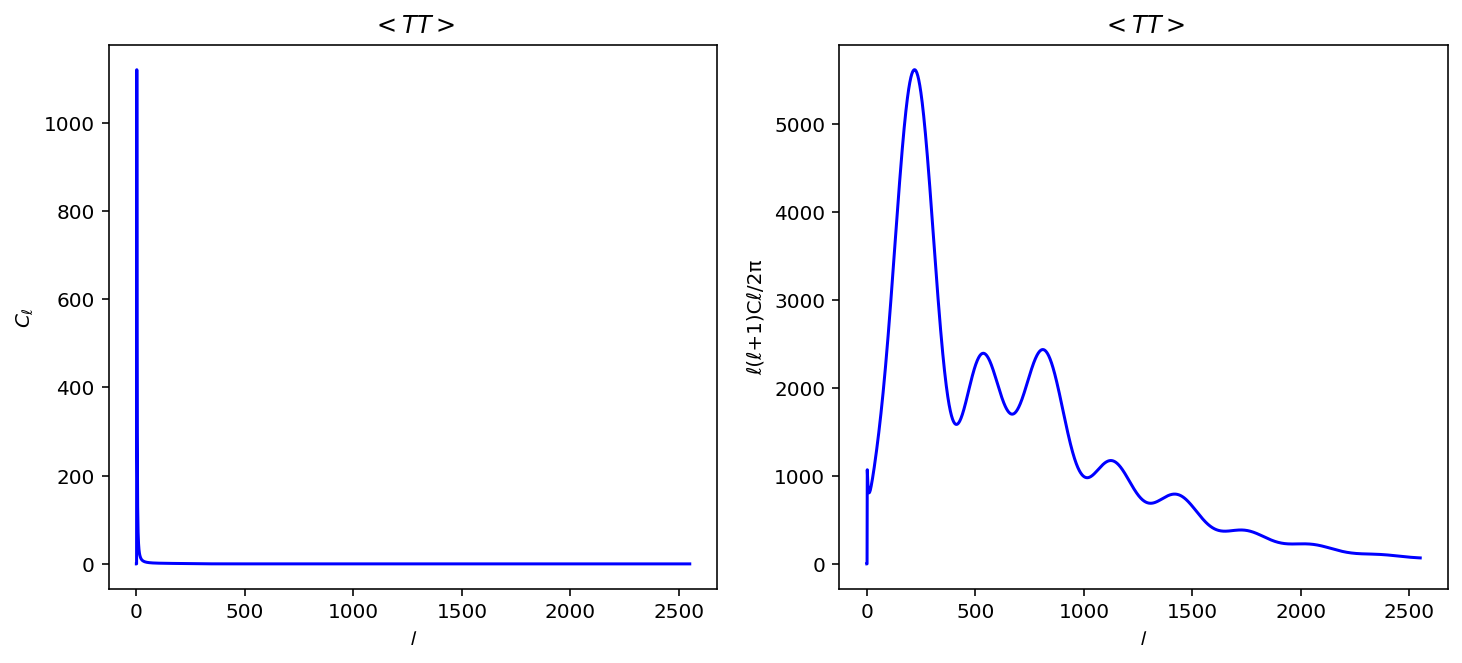

In [6]:
#-Get the < T T > power spectrum Cℓ

#raw_cl = True – return Cℓ rather than ℓ(ℓ+1)Cℓ/2π
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK',raw_cl=True)
powers_2 = results.get_cmb_power_spectra(pars, CMB_unit='muK',raw_cl=False)

totCL = powers['total'] # return Cℓ 
totCL_2 = powers_2['total'] #return ℓ(ℓ+1)Cℓ/2π
ls = np.arange(totCL.shape[0])

fig, axs = plt.subplots(1,2,figsize=(12,5))

axs[0].plot(ls,totCL[:,0], color='b')
axs[0].set_xlabel(r'$\mathcal{l}$')
axs[0].set_ylabel(r'$C_{ℓ} $')
axs[0].set_title(r'$<TT>$')
    
axs[1].plot(ls,totCL_2[:,0], color='b')
axs[1].set_title('$<TT>$')
axs[1].set_xlabel('$\mathcal{l}$')
axs[1].set_ylabel('ℓ(ℓ+1)Cℓ/2π')

In [7]:
#-modes between l= 1 and l= 20 generate gaussian random values for the a_l,m

l_min = 1 
l_max = 20

C_l = totCL[:,0][l_min:l_max+1] #we take C_l values from l_min = 1 to l_max = 20 
std = np.sqrt(C_l) #std: standard deviation


A_LM = []
#a_lm: as "l" runs [l_min, l_max], "m" takes 2*l+1 values
#std[ll = 0], correspond to std for l = l_min = 1
#for this reason we write 2*(ll+1)+1 instead to 2*ll+1
for ll in range(l_max):
    norm = std[ll] * np.random.randn(2*(ll+1)+1) #modulus
    phase =  2 * np.pi * np.random.rand(2*(ll+1)+1) #phase
    a_lm = norm * np.exp(1j * phase) #Gaussian distribution 
    A_LM.append(a_lm)
    
a_lm = np.array(A_LM) # from list to array 


#-Create two arrays, θ(Azimuthal)∈[0, 2π] and φ(Polar)∈[0, π] with 300 bins of values
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.sph_harm.html

vls = 300 #vls: bins of values
theta = np.linspace(0, 2 * np.pi, vls)  #θ (Azimuthal) ∈ [0, 2π]
phi = np.linspace(0, np.pi, vls)        #φ (Polar) ∈ [0, π]
theta_max = np.amax(theta)              # = 2pi
phi_max = np.amax(phi)                  # = pi

#-Create the 2D_arrays of θ and φ values 
theta_2D, phi_2D = np.meshgrid(theta,phi)

It is known that,
$$\Theta (\theta ,\varphi )=\sum _{ l={ l }_{ min } }^{ { l }_{ max } }{ \sum _{ m=-l }^{ l }{ { a }_{ lm }{ Y }_{ lm }( } \theta ,\varphi ) } $$

Reality cond.

$${ a }_{ lm }^{ * }={ (-1) }^{ m }{ a }_{ l,-m }\quad, where \quad { a }_{ l0 }\in \Re $$

we consider the usual notation, that is, $m=-l, -l+1, ..., 0 , 1, 2,...,l $


In [8]:
#Reality condition
for ll in range(l_max):
    for mm in range(-ll,0):
        kk = len(a_lm[ll-1])
        a_lm[ll-1][mm+ll] = (-1)**(-mm) * np.conj(a_lm[ll-1][kk-1-mm-ll])
    a_lm[ll-1][ll] = a_lm[ll-1][ll].real

#-Generate the map of temperature using the values of the a_l,m

tem_map = sum([a_lm[ll][mm] * sp.special.sph_harm(mm,ll,theta_2D, phi_2D) 
               for ll in range(l_min,l_max) for mm in range(-ll,ll+1)])

tem_map = np.array(tem_map).real

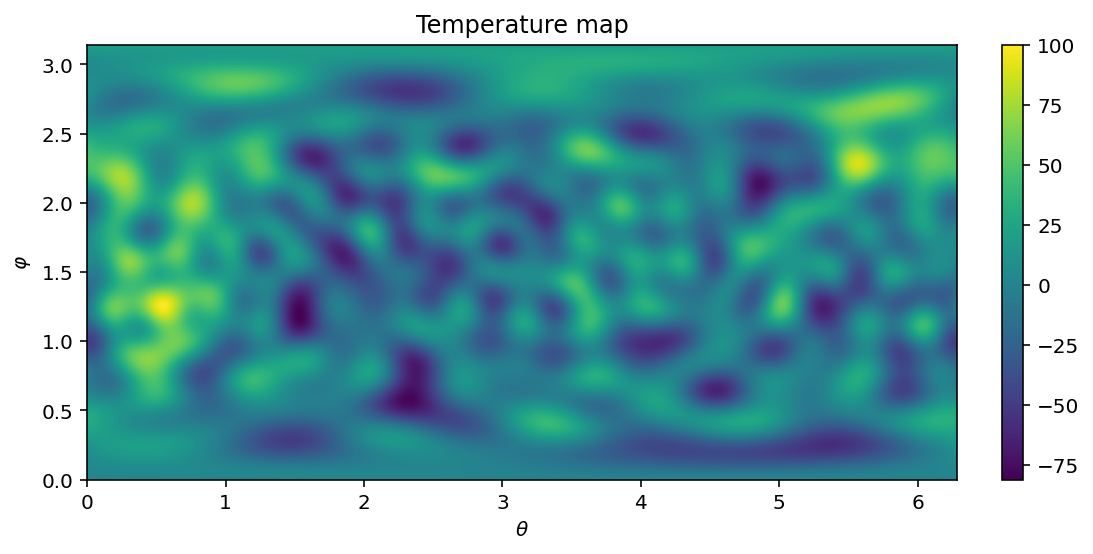

In [9]:
#-Plot the map of temperature you obtain

plt.figure(figsize = (10,4))
im = plt.imshow(tem_map.real, extent = [0 , theta_max, 0, phi_max])
plt.colorbar(im,fraction = 0.046, pad = 0.04)
plt.title(r'Temperature map')
plt.xlabel(r'$\theta$')
plt.ylabel(r'${\varphi}$')
plt.show()

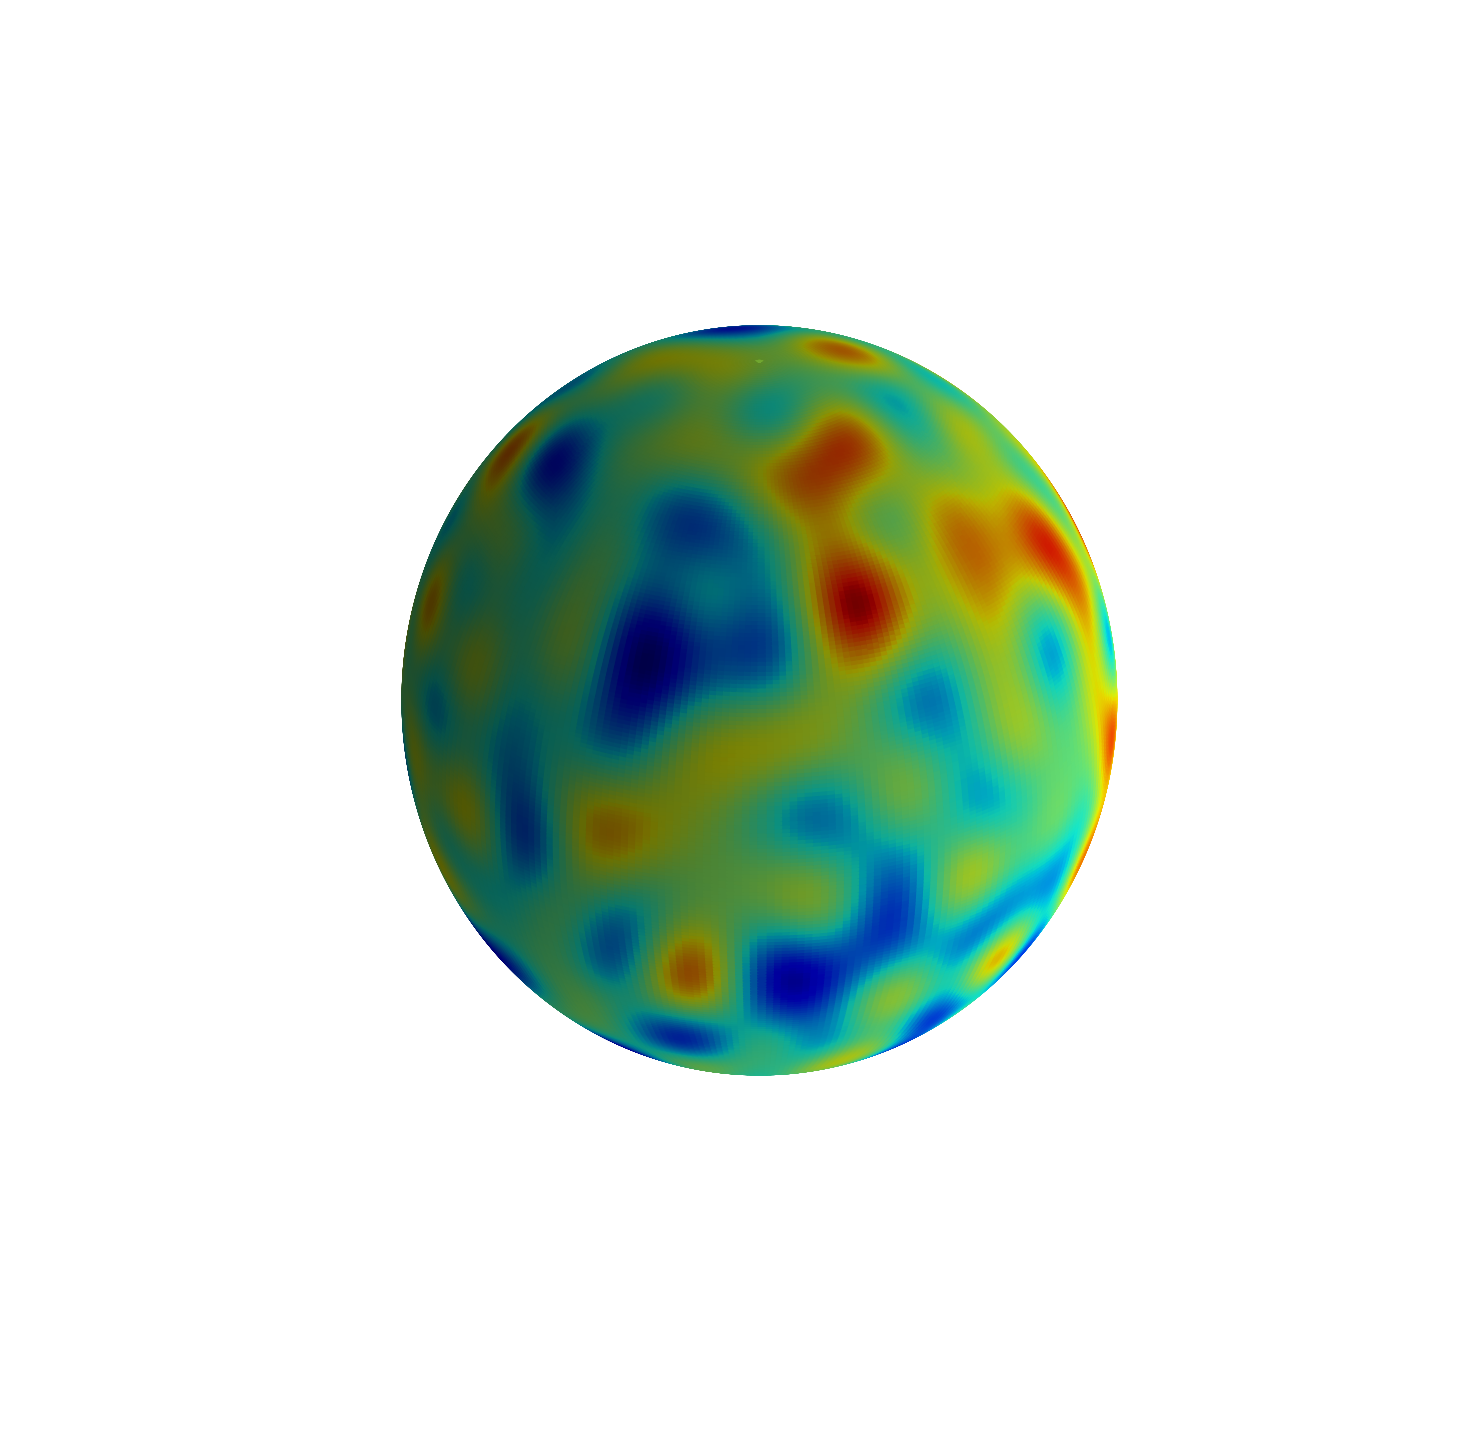

In [10]:
#- BONUS

from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (13,13))
fmax, fmin = tem_map.max(), tem_map.min()
fcolors = (tem_map - fmin)/(fmax - fmin)
ax = fig.add_subplot(111, projection = '3d')
x = np.sin(phi_2D) * np.cos(theta_2D)
y = np.sin(phi_2D) * np.sin(theta_2D)
z = np.cos(phi_2D)
ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cm.jet(fcolors))
ax.set_axis_off()
plt.show()